In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# From spotify data Albert scraped

In [2]:
spotify_data = pd.read_csv('API Scraping Data/top5genres2020_2022.csv')

In [3]:
spotify_data.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,100,2020,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
1,92,2020,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,91,2020,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
3,90,2020,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,...,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
4,90,2020,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,...,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4


In [4]:
# baseline model with predictors

In [5]:
baseline_model = smf.ols(formula='popularity~speechiness+danceability+energy+valence+genre+loudness+acousticness+instrumentalness+liveness+tempo', data=spotify_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1678.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:46:13   Log-Likelihood:                -64280.
No. Observations:               14990   AIC:                         1.286e+05
Df Residuals:                   14976   BIC:                         1.287e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.0069      1.765      8.502      0.000      11.547      18.467
genre[T.hip hop]     1.0890      0.493      2.208      0.027       0.122       2.056
genre[T.pop]        42.1335      0.470     89.579      0.000      41.212      43.055
genre[T.rap]        46.2638      0.488     94.726      0.000      45.306      47.221
genre[T.rock]       43.2392      0.493     87.629      0.000      42.272      44.206
speechiness          4.7749      1.395      3.422      0.001       2.040       7.510
danceability        -1.9797      1.246     -1.589      0.112      -4.422       0.462
energy               8.4454      1.380      6.121      0.000       5.741      11.150
valence             -2.9463      0.756     -3.896      0.000      -4.428      -1.464
loudness            -0.4340      0.076     -5.683      0.000      -0.584      -0.284
acousticness         2.6796      0.784      3.418      0.001       1.143       4.216
instrumentalness     2.5355      1.306      1.942      0.052      -0.023       5.094
liveness            -0.0850      1.041     -0.082      0.935      -2.126       1.956
tempo                0.0155      0.005      3.007      0.003       0.005       0.026
==============================================================================
Omnibus:                     5923.759   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27650.570
Skew:                          -1.896   Prob(JB):                         0.00
Kurtosis:                       8.467   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
model = smf.ols(formula='popularity~speechiness+(danceability*energy)+valence+loudness+genre+(acousticness*instrumentalness)+I(liveness**2)+tempo', data=spotify_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1469.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:46:15   Log-Likelihood:                -64234.
No. Observations:               14990   AIC:                         1.285e+05
Df Residuals:                   14974   BIC:                         1.286e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.6347      2.878     -1.611      0.107     -10.275       1.006
genre[T.hip hop]                  1.1549      0.492      2.348      0.019       0.191       2.119
genre[T.pop]                     42.2581      0.469     90.065      0.000      41.338      43.178
genre[T.rap]                     46.0957      0.487     94.558      0.000      45.140      47.051
genre[T.rock]                    42.8380      0.494     86.720      0.000      41.870      43.806
speechiness                       3.3914      1.401      2.421      0.016       0.645       6.138
danceability                     28.6265      3.812      7.509      0.000      21.154      36.099
energy                           38.2286      3.779     10.116      0.000      30.821      45.636
danceability:energy             -46.8887      5.520     -8.494      0.000     -57.709     -36.068
valence                          -2.5673      0.755     -3.401      0.001      -4.047      -1.088
loudness                         -0.4714      0.076     -6.179      0.000      -0.621      -0.322
acousticness                      4.4137      0.807      5.470      0.000       2.832       5.995
instrumentalness                  6.4092      1.630      3.932      0.000       3.214       9.604
acousticness:instrumentalness   -15.9465      4.090     -3.899      0.000     -23.964      -7.929
I(liveness ** 2)                 -0.3992      1.492     -0.268      0.789      -3.323       2.525
tempo                             0.0123      0.005      2.390      0.017       0.002       0.022
==============================================================================
Omnibus:                     5862.976   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27005.413
Skew:                          -1.879   Prob(JB):                         0.00
Kurtosis:                       8.396   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
predicted_popularity = model.predict(spotify_data)
rmse = np.sqrt(((predicted_popularity-spotify_data['popularity'])**2).mean())

In [8]:
rmse

17.569958962767938

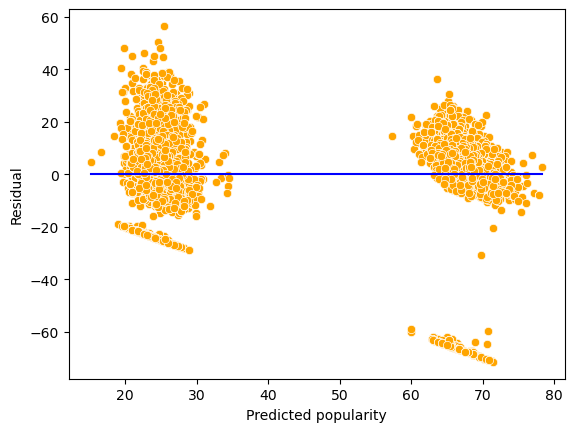

In [9]:
sns.scatterplot(x=model.fittedvalues, y=model.resid, color='orange')
sns.lineplot(x=[predicted_popularity.min(),predicted_popularity.max()], y=[0,0],color='blue')
plt.xlabel('Predicted popularity')
plt.ylabel('Residual')
plt.show()

# From Kaggle data

In [2]:
y1950 = pd.read_csv('Kaggle Data/1950.xls')
y1960 = pd.read_csv('Kaggle Data/1960.xls')
y1970 = pd.read_csv('Kaggle Data/1970.xls')
y1980 = pd.read_csv('Kaggle Data/1980.xls')
y1990 = pd.read_csv('Kaggle Data/1990.xls')
y2000 = pd.read_csv('Kaggle Data/2000.xls')
y2010 = pd.read_csv('Kaggle Data/2010.xls')

In [3]:
y1950['decade'] = 1950
y1960['decade'] = 1960
y1970['decade'] = 1970
y1980['decade'] = 1980
y1990['decade'] = 1990
y2000['decade'] = 2000
y2010['decade'] = 2010

In [4]:
all_data = pd.concat([y1950,y1960,y1970,y1980,y1990,y2000,y2010])
all_data.reset_index(drop=True)
all_data.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,1950
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1950
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,1950
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,1950
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,1950


In [5]:
all_data['top genre'].value_counts()

dance pop                 114
adult standards            93
album rock                 77
glam rock                  23
brill building pop         20
                         ... 
australian talent show      1
afrobeat                    1
british blues               1
afropop                     1
aussietronica               1
Name: top genre, Length: 115, dtype: int64

In [6]:
all_data.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,48.718141,1994.967016,119.121439,61.394303,60.325337,-8.356822,18.188906,57.311844,224.002999,29.917541,6.179910,63.349325,1981.064468
std,28.414748,17.771374,25.030827,21.703963,15.051583,3.659509,14.380929,24.400412,59.742591,28.865081,6.191199,13.725845,19.488359
min,1.000000,1945.000000,62.000000,6.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000,1950.000000
25%,24.000000,1980.000000,101.500000,45.000000,51.000000,-11.000000,9.000000,39.000000,185.000000,6.000000,3.000000,56.000000,1960.000000
50%,48.000000,1998.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,58.000000,218.000000,19.000000,4.000000,66.000000,1980.000000
75%,72.000000,2010.000000,134.000000,79.000000,71.000000,-6.000000,24.000000,78.000000,254.000000,52.000000,6.000000,73.500000,2000.000000
max,105.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,94.000000,2010.000000


In [7]:
corr_data = all_data.corrwith(all_data['pop'])

In [8]:
corr_data.sort_values(ascending=False) # this is all the correlations with pop - the popularity col

pop       1.000000
decade    0.661528
dB        0.365172
dur       0.280501
nrgy      0.271798
dnce      0.249302
spch      0.192929
year      0.160467
bpm       0.066558
live     -0.036505
val      -0.102418
acous    -0.455239
Number   -0.519745
dtype: float64

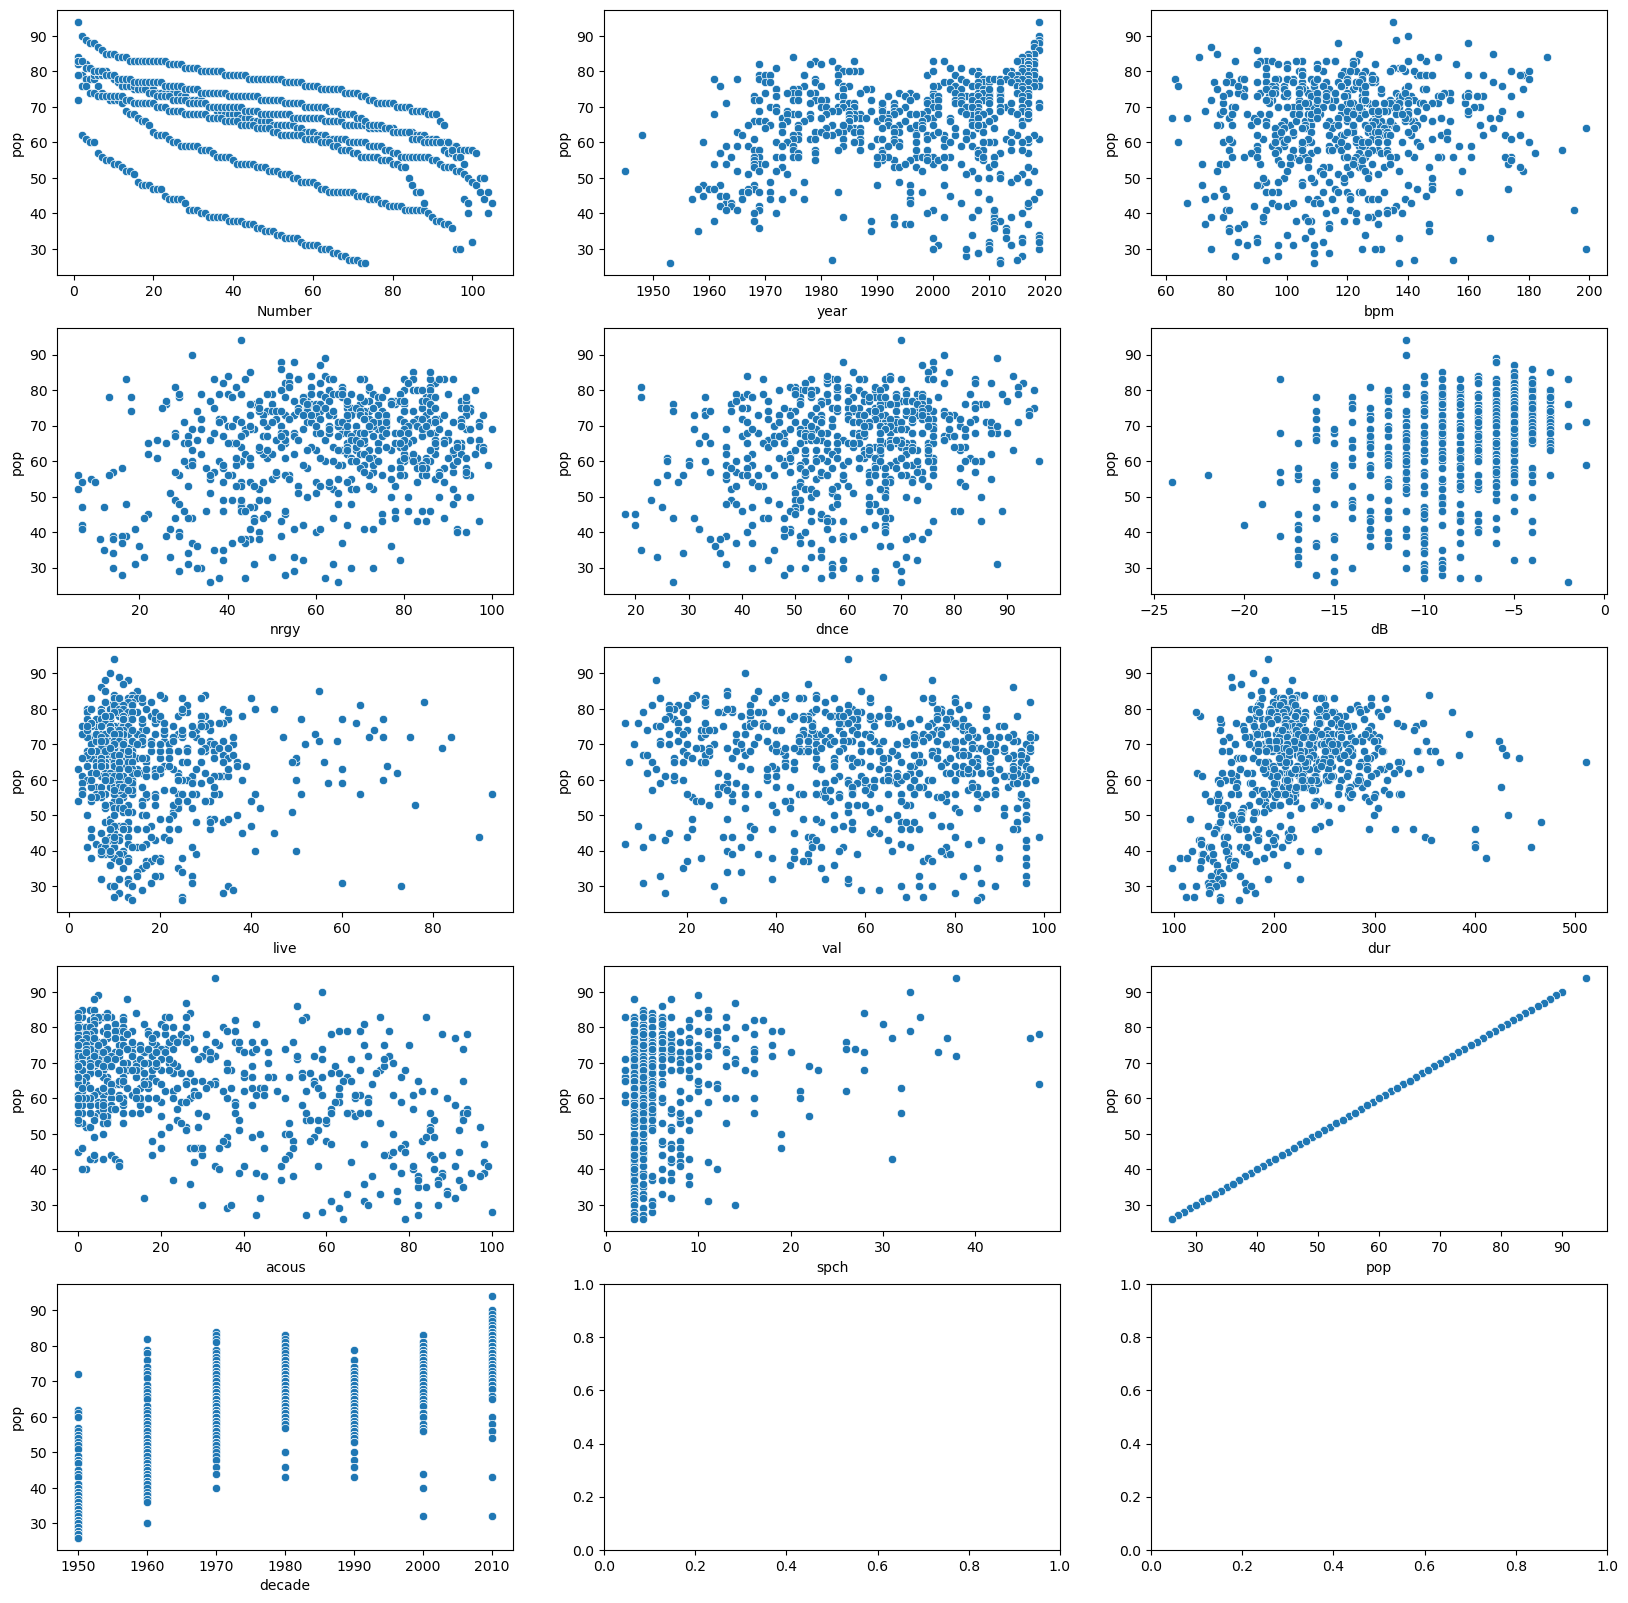

In [9]:
# pop and decade; pop and acous, pop and dB, pop and dur,  pop and nrgy?
predictors = corr_data.index
fig, axes = plt.subplots(5,3,figsize=(20,20))
p = 0
for i in range(5):
    for j in range(3):
        
        if p >= 13:
            break
        predictor = predictors[p]
        
        sns.scatterplot(ax=axes[i,j], x=predictor,y='pop',data=all_data)
        p+=1
plt.show()

Duration seems to have a pseudo-quadratic or maybe square root or logarithmic relationship with pop, let's try transforming it quadratically, logarithmically, and with a square root

Can ignore number as a predictor, meaningless. Could try and see if decade has an effect but we're not expecting a significant effect from decade bcuz of the fixed value (e.g. 1950 for any year between 1950-1959).

Can't use year as a predictor either bcuz 1) rereleases in the orig data, 2) can't control what year your song comes out

Top 5 predictors most corr with pop: acous, dB, dur, nrgy, dnce

In [10]:
from sklearn.model_selection import train_test_split
X = all_data.drop('pop', axis=1)
y = all_data['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [11]:
# initial model
model = smf.ols(formula='pop~acous+dB+dur+dnce+nrgy+val', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     46.75
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           6.53e-46
Time:                        12:39:43   Log-Likelihood:                -2022.4
No. Observations:                 533   AIC:                             4059.
Df Residuals:                     526   BIC:                             4089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5827      4.697     15.026      0.000      61.355      79.811
acous         -0.1697      0.024     -7.090      0.000      -0.217      -0.123
dB             1.0767      0.194      5.543      0.000       0.695       1.458
dur            0.0389      0.008      4.674      0.000       0.023       0.055
dnce           0.1801      0.038      4.742      0.000       0.105       0.255
nrgy          -0.1181      0.041     -2.873      0.004      -0.199      -0.037
val           -0.0961      0.025     -3.799      0.000      -0.146      -0.046
==============================================================================
Omnibus:                       11.190   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.409
Skew:                          -0.357   Prob(JB):                      0.00333
Kurtosis:                       3.068   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(np.sqrt(model.mse_resid))
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

10.827442347291603


13.009560351987444

In [13]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

10.485054290070055

In [15]:
train['top genre'].value_counts()

dance pop                92
adult standards          67
album rock               62
glam rock                20
boy band                 15
                         ..
classic danish pop        1
american folk revival     1
latin                     1
german dance              1
australian rock           1
Name: top genre, Length: 100, dtype: int64

In [15]:
# with dur**2

In [16]:
model = smf.ols(formula='pop~acous+dB+dur+dnce+nrgy+I(dur**2)', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     52.43
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.41e-50
Time:                        22:39:26   Log-Likelihood:                -2011.4
No. Observations:                 533   AIC:                             4037.
Df Residuals:                     526   BIC:                             4067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.6792      7.009      5.947      0.000      27.911      55.448
acous          -0.1480      0.024     -6.197      0.000      -0.195      -0.101
dB              1.2111      0.181      6.690      0.000       0.855       1.567
dur             0.3007      0.042      7.086      0.000       0.217       0.384
dnce            0.1010      0.033      3.018      0.003       0.035       0.167
nrgy           -0.1747      0.035     -4.969      0.000      -0.244      -0.106
I(dur ** 2)    -0.0005   8.09e-05     -6.105      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        5.659   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.493
Skew:                          -0.242   Prob(JB):                       0.0641
Kurtosis:                       3.116   Cond. No.                     9.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
np.sqrt(model.mse_resid)

10.605587899574425

In [18]:
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

12.612542374525157

In [19]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae 

10.070348273739508

In [20]:
# improved mae compared to initial model

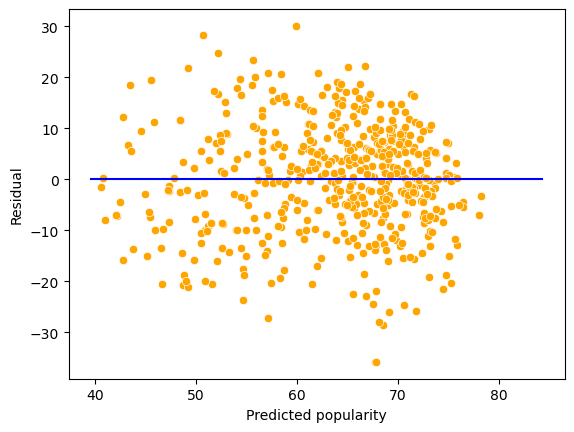

In [21]:
sns.scatterplot(x=model.fittedvalues, y=model.resid, color='orange')
sns.lineplot(x=[pred_pop.min(),pred_pop.max()], y=[0,0],color='blue')
plt.xlabel('Predicted popularity')
plt.ylabel('Residual')
plt.show()

No observable trends present

The residual plot for the most part satisfies the linearity assumption and the constant variance assumption

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = train[['acous','dB','dur','nrgy','dnce']] # , 'spch','year','val'
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

  feature        VIF
0   const  95.334786
1   acous   1.962229
2      dB   1.984126
3     dur   1.044321
4    nrgy   2.584308
5    dnce   1.215342


Low collinearity with each other

In [23]:
# with np.log(dur)
model = smf.ols(formula='pop~acous+dB+dur+dnce+nrgy+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     55.83
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.79e-53
Time:                        22:39:36   Log-Likelihood:                -2005.0
No. Observations:                 533   AIC:                             4024.
Df Residuals:                     526   BIC:                             4054.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -241.2622     44.474     -5.425      0.000    -328.630    -153.895
acous             -0.1369      0.024     -5.753      0.000      -0.184      -0.090
dB                 1.1901      0.179      6.651      0.000       0.839       1.542
dur               -0.2481      0.042     -5.911      0.000      -0.331      -0.166
dnce               0.1027      0.033      3.107      0.002       0.038       0.168
nrgy              -0.1709      0.035     -4.916      0.000      -0.239      -0.103
I(np.log(dur))    70.3770      9.861      7.137      0.000      51.005      89.749
==============================================================================
Omnibus:                        7.024   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.925
Skew:                          -0.248   Prob(JB):                       0.0313
Kurtosis:                       3.257   Cond. No.                     2.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
np.sqrt(model.mse_resid)

10.479287133395095

In [25]:
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

12.385599787689568

In [26]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

9.789270326253087

In [27]:
# rmse, rse, r^2 improved altho very slightly!
# but mae definitely improved

In [28]:
# with np.sqrt(dur)
model = smf.ols(formula='pop~acous+dB+dur+dnce+nrgy+I(np.sqrt(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     55.14
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           9.82e-53
Time:                        22:39:42   Log-Likelihood:                -2006.3
No. Observations:                 533   AIC:                             4027.
Df Residuals:                     526   BIC:                             4057.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -66.3821     20.793     -3.193      0.001    -107.229     -25.535
acous              -0.1391      0.024     -5.840      0.000      -0.186      -0.092
dB                  1.1927      0.179      6.649      0.000       0.840       1.545
dur                -0.5301      0.083     -6.354      0.000      -0.694      -0.366
dnce                0.1015      0.033      3.064      0.002       0.036       0.167
nrgy               -0.1715      0.035     -4.922      0.000      -0.240      -0.103
I(np.sqrt(dur))    17.9879      2.592      6.939      0.000      12.895      23.081
==============================================================================
Omnibus:                        6.463   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.307
Skew:                          -0.242   Prob(JB):                       0.0427
Kurtosis:                       3.222   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
np.sqrt(model.mse_resid)

10.504717673642384

In [30]:
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

12.426899629750697

In [31]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

9.856211168239046

In [32]:
# the np.log() model seems to work best of the 3 options

In [33]:
# adding val and spch --> spch not statistically significant at 0.05 level
model = model = smf.ols(formula='pop~acous+dB+dur+dnce+nrgy+val+spch+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     44.14
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           4.96e-54
Time:                        22:39:45   Log-Likelihood:                -1999.0
No. Observations:                 533   AIC:                             4016.
Df Residuals:                     524   BIC:                             4055.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -229.1319     44.439     -5.156      0.000    -316.432    -141.831
acous             -0.1268      0.024     -5.318      0.000      -0.174      -0.080
dB                 0.9884      0.187      5.277      0.000       0.620       1.356
dur               -0.2391      0.042     -5.716      0.000      -0.321      -0.157
dnce               0.1404      0.037      3.774      0.000       0.067       0.213
nrgy              -0.1177      0.039     -2.981      0.003      -0.195      -0.040
val               -0.0693      0.025     -2.821      0.005      -0.118      -0.021
spch               0.1354      0.077      1.765      0.078      -0.015       0.286
I(np.log(dur))    66.9280      9.882      6.773      0.000      47.514      86.342
==============================================================================
Omnibus:                       10.191   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.316
Skew:                          -0.306   Prob(JB):                      0.00575
Kurtosis:                       3.302   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# improved model
model = model = smf.ols(formula='pop~acous+dB+dur+dnce+nrgy+val+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     49.80
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.11e-54
Time:                        22:39:47   Log-Likelihood:                -2000.6
No. Observations:                 533   AIC:                             4017.
Df Residuals:                     525   BIC:                             4051.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -225.4059     44.478     -5.068      0.000    -312.783    -138.029
acous             -0.1265      0.024     -5.294      0.000      -0.173      -0.080
dB                 1.0193      0.187      5.455      0.000       0.652       1.386
dur               -0.2360      0.042     -5.636      0.000      -0.318      -0.154
dnce               0.1515      0.037      4.123      0.000       0.079       0.224
nrgy              -0.1141      0.040     -2.887      0.004      -0.192      -0.036
val               -0.0724      0.025     -2.949      0.003      -0.121      -0.024
I(np.log(dur))    66.1756      9.893      6.689      0.000      46.741      85.610
==============================================================================
Omnibus:                        9.644   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.873
Skew:                          -0.285   Prob(JB):                      0.00718
Kurtosis:                       3.348   Cond. No.                     2.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
print(np.sqrt(model.mse_resid))
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

10.403468823066705


12.164435503712417

In [36]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

9.681611232339673

In [37]:
# mae improved, both rse , r^2, and rmse improved as well

In [38]:
all_data[['pop','acous','dB','dur','dnce','nrgy','val']].corr()

,pop,acous,dB,dur,dnce,nrgy,val
pop,1.000000,-0.455239,0.365172,0.280501,0.249302,0.271798,-0.102418
acous,-0.455239,1.000000,-0.504551,-0.227505,-0.382297,-0.665900,-0.196375
dB,0.365172,-0.504551,1.000000,0.026851,0.295534,0.702543,0.136813
dur,0.280501,-0.227505,0.026851,1.000000,0.053011,0.131228,-0.118664
dnce,0.249302,-0.382297,0.295534,0.053011,1.000000,0.331962,0.454714
nrgy,0.271798,-0.665900,0.702543,0.131228,0.331962,1.000000,0.405190
val,-0.102418,-0.196375,0.136813,-0.118664,0.454714,0.405190,1.000000


nrgy and dB seem to be quite correlated, as is nrgy and acous : perhaps an interaction term between these 2 pairs!

In [39]:
# improved model v2
model = model = smf.ols(formula='pop~nrgy*acous+nrgy*dB+dur+dnce+val+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     40.02
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.53e-54
Time:                        22:39:52   Log-Likelihood:                -1996.7
No. Observations:                 533   AIC:                             4013.
Df Residuals:                     523   BIC:                             4056.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -228.0359     44.270     -5.151      0.000    -315.005    -141.067
nrgy              -0.1201      0.061     -1.982      0.048      -0.239      -0.001
acous             -0.2635      0.055     -4.761      0.000      -0.372      -0.155
nrgy:acous         0.0026      0.001      2.767      0.006       0.001       0.004
dB                 0.5074      0.412      1.230      0.219      -0.303       1.318
nrgy:dB            0.0085      0.007      1.277      0.202      -0.005       0.022
dur               -0.2438      0.042     -5.838      0.000      -0.326      -0.162
dnce               0.1426      0.037      3.877      0.000       0.070       0.215
val               -0.0795      0.025     -3.231      0.001      -0.128      -0.031
I(np.log(dur))    67.2343      9.851      6.825      0.000      47.881      86.587
==============================================================================
Omnibus:                        9.958   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.284
Skew:                          -0.286   Prob(JB):                      0.00585
Kurtosis:                       3.369   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# these interactions make dB and nrgy:dB not significant; let's try just nrgy and acous

In [41]:
# improved model v3
model = model = smf.ols(formula='pop~acous*nrgy+dB+dur+dnce+val+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     44.77
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.13e-54
Time:                        22:39:54   Log-Likelihood:                -1997.5
No. Observations:                 533   AIC:                             4013.
Df Residuals:                     524   BIC:                             4052.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -225.7980     44.262     -5.101      0.000    -312.751    -138.845
acous             -0.2242      0.046     -4.871      0.000      -0.315      -0.134
nrgy              -0.1711      0.046     -3.756      0.000      -0.261      -0.082
acous:nrgy         0.0019      0.001      2.479      0.013       0.000       0.003
dB                 0.9770      0.187      5.232      0.000       0.610       1.344
dur               -0.2435      0.042     -5.828      0.000      -0.326      -0.161
dnce               0.1411      0.037      3.835      0.000       0.069       0.213
val               -0.0799      0.025     -3.244      0.001      -0.128      -0.032
I(np.log(dur))    67.3770      9.857      6.836      0.000      48.014      86.740
==============================================================================
Omnibus:                        9.836   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.051
Skew:                          -0.290   Prob(JB):                      0.00657
Kurtosis:                       3.341   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
print(np.sqrt(model.mse_resid))
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

10.352841495193081


12.354904417489458

In [43]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

9.669944695835966

In [44]:
# R^2, rse improved, RMSE did not, but mae improved too

In [45]:
# improved model v4 
# use nrgy and dance, bcuz they seem to be related from a logical perspective instead of acous and nrgy|
model_best = smf.ols(formula='pop~acous+dB+dur+nrgy*dnce+val+I(np.log(dur))', data=train).fit()
model_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     45.52
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.97e-55
Time:                        22:39:59   Log-Likelihood:                -1995.7
No. Observations:                 533   AIC:                             4009.
Df Residuals:                     524   BIC:                             4048.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -252.3448     44.948     -5.614      0.000    -340.644    -164.045
acous             -0.1078      0.024     -4.409      0.000      -0.156      -0.060
dB                 0.9601      0.186      5.154      0.000       0.594       1.326
dur               -0.2426      0.042     -5.834      0.000      -0.324      -0.161
nrgy               0.1570      0.095      1.648      0.100      -0.030       0.344
dnce               0.4220      0.094      4.490      0.000       0.237       0.607
nrgy:dnce         -0.0045      0.001     -3.123      0.002      -0.007      -0.002
val               -0.0794      0.024     -3.245      0.001      -0.127      -0.031
I(np.log(dur))    68.4033      9.837      6.953      0.000      49.078      87.729
==============================================================================
Omnibus:                        8.968   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.020
Skew:                          -0.282   Prob(JB):                       0.0110
Kurtosis:                       3.297   Cond. No.                     4.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# this model seems better except for the fact that nrgy is not statistically significant at the 5% level 
# will use lasso for this one since R^2 is the best so far

In [47]:
print(np.sqrt(model_best.mse_resid))
pred_pop = model_best.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

10.317825841965915


12.38880848149714

In [48]:
# this model (model v4) has the lowest mae, but one of the predictors isn't significant

In [49]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

9.632205410634889

This model has the best MAE, but one of the predictors is insignificant. Let's try lasso.

But before we try lasso, we need to check for outliers and multicollinearity too

In [50]:
# check for outliers

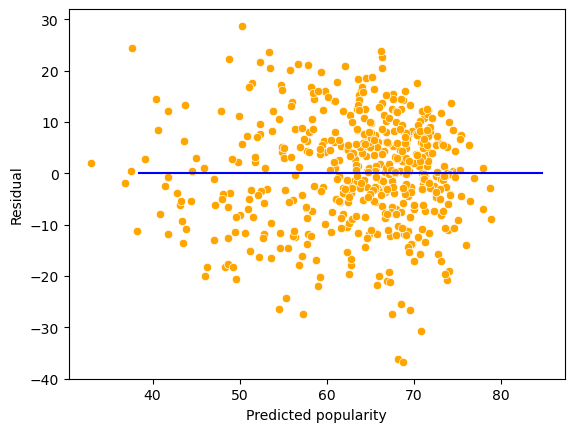

In [51]:
sns.scatterplot(x=model_best.fittedvalues, y=model_best.resid, color='orange')
sns.lineplot(x=[pred_pop.min(),pred_pop.max()], y=[0,0],color='blue')
plt.xlabel('Predicted popularity')
plt.ylabel('Residual')
plt.show()

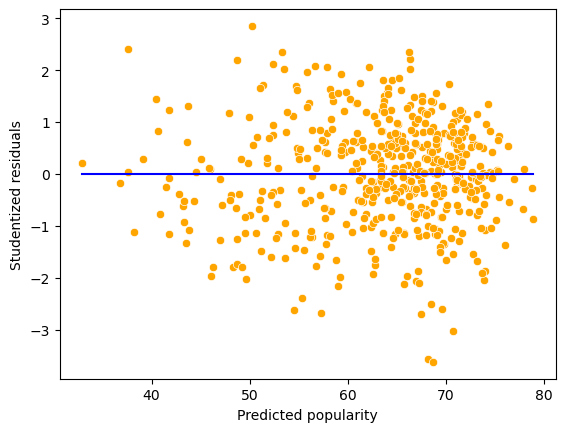

In [81]:
out = model_best.outlier_test()
# returns a df w the first col as studentized residuals
# res plot, this time w studentized residuals
sns.scatterplot(x=model_best.fittedvalues, y = out.student_resid, color='orange')
sns.lineplot(x = [model_best.fittedvalues.min(),model_best.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Predicted popularity')
plt.ylabel('Studentized residuals')
plt.show()


In [53]:
print(np.sum(np.abs(out.student_resid) > 3))

3


3 outliers

In [54]:
# leverage calculations
influence = model_best.get_influence()
leverage = influence.hat_matrix_diag
cutoff = 4*(model_best.df_model+1)/model_best.nobs
print(np.sum(leverage>cutoff))

6


6 high leverage points

In [55]:
#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>cutoff)[0])))

In [56]:
train_filtered.shape[0]-train.shape[0]

0

No influential points in the training data

In [57]:
# check for collinearity
X = train[['acous','dB','dur','nrgy','dnce', 'val']] # , 'spch','year','val'
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

  feature         VIF
0   const  100.318376
1   acous    2.041036
2      dB    2.211130
3     dur    1.102155
4    nrgy    3.422549
5    dnce    1.509009
6     val    1.731622


In [58]:
# all predictors have a VIF < 5, low collinearity with each other

In [59]:
# now let's perform lasso

In [60]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [61]:
X = train[['acous','dB','dur','nrgy','dnce','val']]
X['nrgy*dnce'] = X['nrgy']*X['dnce']
X['I(np.log(dur))'] = np.log(X['dur'])
X

C:\Users\nkim0\AppData\Local\Temp\ipykernel_30788\1067562825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['nrgy*dnce'] = X['nrgy']*X['dnce']
C:\Users\nkim0\AppData\Local\Temp\ipykernel_30788\1067562825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['I(np.log(dur))'] = np.log(X['dur'])


,acous,dB,dur,nrgy,dnce,val,nrgy*dnce,I(np.log(dur))
64,10,-9,225,81,63,96,5103,5.416100
19,8,-1,222,74,92,62,6808,5.402677
4,21,-9,291,82,71,87,5822,5.673323
61,70,-14,135,14,52,26,728,4.905275
72,79,-10,140,49,55,44,2695,4.941642
...,...,...,...,...,...,...,...,...
71,64,-15,165,36,27,28,972,5.105945
33,91,-15,275,16,62,33,992,5.616771
100,35,-8,146,91,64,69,5824,4.983607
56,5,-5,191,87,64,88,5568,5.252273


In [62]:
# let us develop a lasso model to predict pop based on the predictors in model_best

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [63]:
Xstd

array([[-0.67179436, -0.20121177, -0.00488891, ...,  1.56934391,
         0.70185622,  0.12318873],
       [-0.74324331,  2.02727396, -0.05565107, ...,  0.17592645,
         1.69424533,  0.07063617],
       [-0.27882516, -0.20121177,  1.11187862, ...,  1.20049811,
         1.12034758,  1.13024382],
       ...,
       [ 0.22131747,  0.07734894, -1.34162581, ...,  0.46280652,
         1.12151168, -1.57007078],
       [-0.85041673,  0.91303109, -0.5801934 , ...,  1.24148098,
         0.9725078 , -0.51821143],
       [ 0.32849089,  2.02727396, -1.05397357, ..., -0.27488508,
        -0.13629059, -1.13884686]])

In [64]:
y = train['pop']
alphas = 10**np.linspace(10,-2,100)*0.1
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

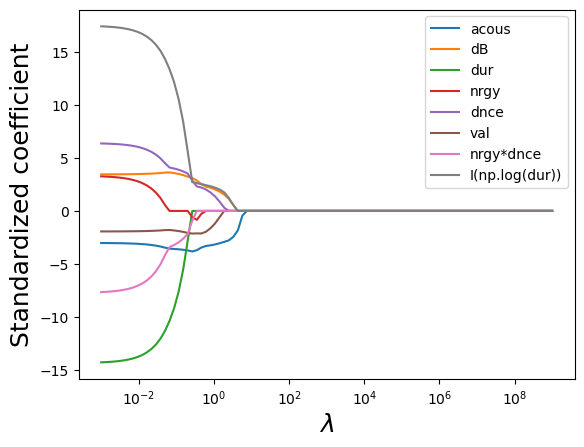

In [65]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(X);

In [66]:
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

5.484928989461909e-06

Text(0, 0.5, 'Cross-validation error')

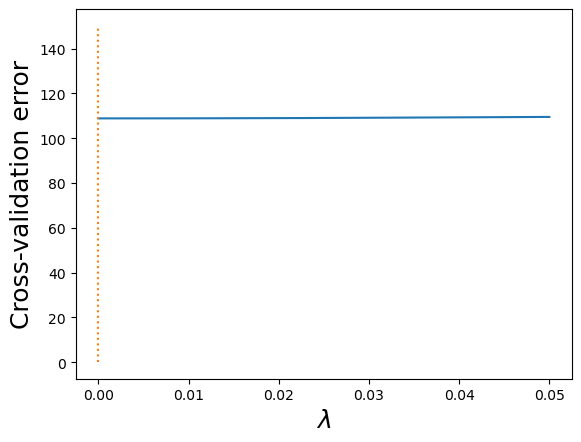

In [67]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,150.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

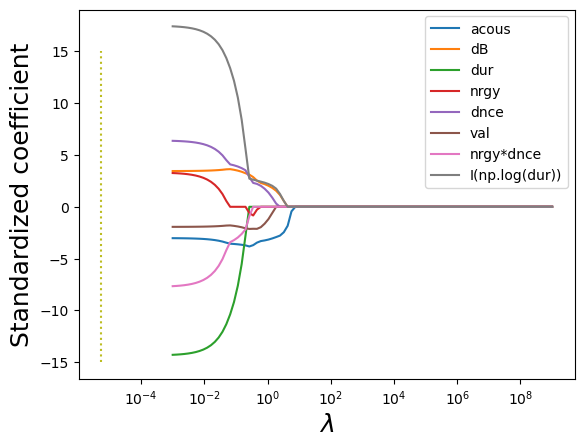

In [68]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-15,15],':')
plt.legend(X);

In [69]:
Xtest = test[['acous','dB','dur','nrgy','dnce','val']]
Xtest['nrgy*dnce'] = Xtest['nrgy']*Xtest['dnce']
Xtest['I(np.log(dur))'] = np.log(Xtest['dur'])

Xtest_std = scaler.transform(Xtest)

C:\Users\nkim0\AppData\Local\Temp\ipykernel_30788\1475412427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['nrgy*dnce'] = Xtest['nrgy']*Xtest['dnce']
C:\Users\nkim0\AppData\Local\Temp\ipykernel_30788\1475412427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['I(np.log(dur))'] = np.log(Xtest['dur'])


In [70]:
#Using the developed lasso model to predict on test data

lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [71]:
best_coeffs = lasso.coef_

In [72]:
final_results = pd.DataFrame(best_coeffs, index=X.columns)

In [73]:
X.columns

Index(['acous', 'dB', 'dur', 'nrgy', 'dnce', 'val', 'nrgy*dnce',
       'I(np.log(dur))'],
      dtype='object')

In [74]:
final_results

,0
acous,-3.016208
dB,3.446623
dur,-14.336883
nrgy,3.311963
dnce,6.402069
val,-1.936220
nrgy*dnce,-7.726661
I(np.log(dur)),17.471280


In [75]:
#RMSE on test data
np.sqrt(((pred-test['pop'])**2).mean())

12.38880109428956

In [76]:
# mae on test data
(np.abs(test['pop'] - pred)).mean()

9.632210796802891

The resulting MAE was extremely similar to the one obtained from model_best, therefore the model is not overfitting

In [77]:
# improved model v5
# tried dur*dnce, R^2 went up and all predictors are significant, 
# this could be explained that ppl want to dance more when the duration is longer
model = model = smf.ols(formula='pop~acous*nrgy+dB+dur*dnce+val+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     42.39
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           7.77e-57
Time:                        22:40:46   Log-Likelihood:                -1990.3
No. Observations:                 533   AIC:                             4001.
Df Residuals:                     523   BIC:                             4043.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -267.9731     45.113     -5.940      0.000    -356.598    -179.349
acous             -0.2194      0.045     -4.827      0.000      -0.309      -0.130
nrgy              -0.1698      0.045     -3.775      0.000      -0.258      -0.081
acous:nrgy         0.0019      0.001      2.528      0.012       0.000       0.003
dB                 1.0099      0.185      5.471      0.000       0.647       1.373
dur               -0.1621      0.047     -3.483      0.001      -0.254      -0.071
dnce               0.5466      0.113      4.826      0.000       0.324       0.769
dur:dnce          -0.0018      0.000     -3.780      0.000      -0.003      -0.001
val               -0.0756      0.024     -3.105      0.002      -0.123      -0.028
I(np.log(dur))    71.7213      9.802      7.317      0.000      52.466      90.977
==============================================================================
Omnibus:                       12.088   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.179
Skew:                          -0.300   Prob(JB):                      0.00137
Kurtosis:                       3.482   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
print(np.sqrt(model.mse_resid))
pred_pop = model.predict(test)
rmse =  np.sqrt(((pred_pop-test['pop'])**2).mean())
rmse

10.224019133582507


12.509302415745028

In [79]:
mae = (np.abs(test['pop'] - pred_pop)).mean()
mae

9.694224634507483

In [80]:
# improved model v6
model = smf.ols(formula='pop~acous*nrgy+dB+dur*dnce+val+I(np.log(dur))', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     42.39
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           7.77e-57
Time:                        22:40:49   Log-Likelihood:                -1990.3
No. Observations:                 533   AIC:                             4001.
Df Residuals:                     523   BIC:                             4043.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -267.9731     45.113     -5.940      0.000    -356.598    -179.349
acous             -0.2194      0.045     -4.827      0.000      -0.309      -0.130
nrgy              -0.1698      0.045     -3.775      0.000      -0.258      -0.081
acous:nrgy         0.0019      0.001      2.528      0.012       0.000       0.003
dB                 1.0099      0.185      5.471      0.000       0.647       1.373
dur               -0.1621      0.047     -3.483      0.001      -0.254      -0.071
dnce               0.5466      0.113      4.826      0.000       0.324       0.769
dur:dnce          -0.0018      0.000     -3.780      0.000      -0.003      -0.001
val               -0.0756      0.024     -3.105      0.002      -0.123      -0.028
I(np.log(dur))    71.7213      9.802      7.317      0.000      52.466      90.977
==============================================================================
Omnibus:                       12.088   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.179
Skew:                          -0.300   Prob(JB):                      0.00137
Kurtosis:                       3.482   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Classification

Because of the issues with the genre in the spotify scraped data, we decided to pivot to classification of popularity

In [21]:
# looking at pop songs
pop_songs = pd.read_csv('API Scraping Data/pop2000_2023.csv')

In [22]:
pop_songs.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,...,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,...,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3


In [ ]:
# checking pop songs

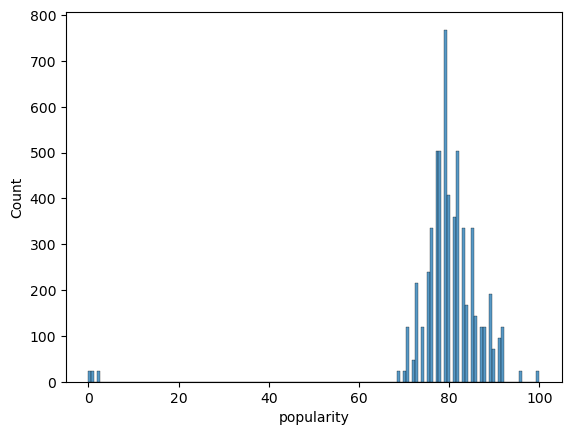

In [29]:
sns.histplot(x='popularity', data=pop_songs)
plt.xlabel('popularity')
plt.show()

In [27]:
pop_songs[pop_songs['popularity'] < 20].shape[0]

72

In [28]:
pop_songs.shape[0]

6000

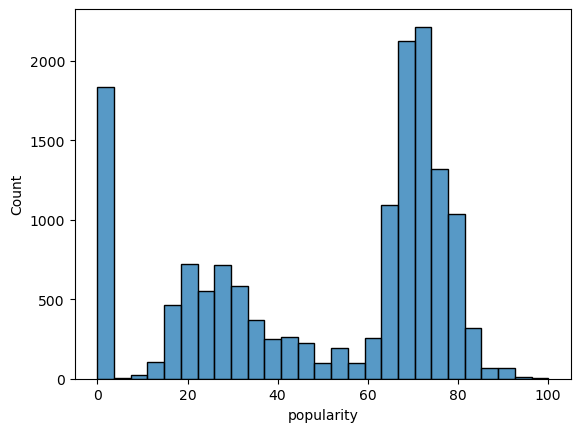

In [31]:
# actual spotify data
sns.histplot(x='popularity',data=spotify_data)
plt.xlabel('popularity')
plt.show()

In [36]:
spotify_data[spotify_data['popularity'] < 50].shape[0]

6126

In [37]:
spotify_data[spotify_data['popularity'] >= 50].shape[0]

8864

In [41]:
pop_songs.corrwith(pop_songs['popularity']).sort_values(ascending=False)

popularity          1.000000e+00
key                 9.192341e-02
loudness            8.041743e-02
acousticness        5.709309e-02
mode                5.099369e-02
tempo               4.188927e-02
energy              7.249566e-03
year                9.122229e-17
danceability       -3.143335e-02
instrumentalness   -3.884534e-02
liveness           -3.917200e-02
valence            -4.200685e-02
duration_ms        -5.101235e-02
time_signature     -6.535569e-02
speechiness        -1.438142e-01
dtype: float64

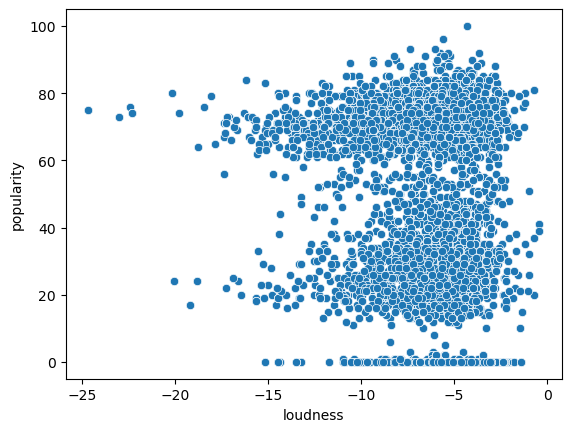

In [44]:
sns.scatterplot(x='loudness',y='popularity', data=spotify_data)
plt.show()

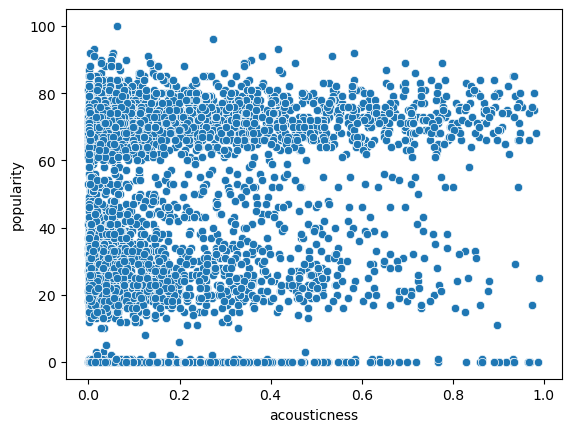

In [45]:
sns.scatterplot(x='acousticness',y='popularity', data=spotify_data)
plt.show()